## Gathering of data

In [299]:
import pandas as pd
import numpy as np
import requests
import os
import json
import matplotlib.pyplot as plt

In [300]:
Twitter_archive=pd.read_csv("C:/Users/user/Documents/UDACITY/TERM 2/Project/twitter-archive-enhanced.csv")

In [301]:
Twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [302]:
folder_name = 'image_prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [303]:
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [304]:
response=requests.get(url)
with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [305]:
image_prediction = pd.read_csv("C:/Users/user/image_prediction/image-predictions.tsv", sep='\t')

In [306]:
image_prediction.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Used the file given from udacity as I had some problems to download the data using twitter API 

In [307]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


NameError: name 'df_1' is not defined

In [308]:
df= []
with open('C:/Users/user/Desktop/tweet-json.txt') as json_file:
    for line in json_file:
        data = json.loads(line)
        tweet_id = data['id_str']
        favorite_count = data['favorite_count']
        retweet_count =data['retweet_count']
        retweeted= data['retweeted']
        df.append({'tweet_id': (tweet_id),
                        'favorite_count': int(favorite_count),
                        'retweet_count': int(retweet_count),
                        'retweeted' :(retweeted)})

In [309]:
df = pd.DataFrame(df, columns = ['tweet_id', 'favorite_count', 'retweet_count','retweeted'])
df.to_csv('tweet_json.txt', encoding = 'utf-8')

In [310]:
df = pd.read_csv('tweet_json.txt', encoding = 'utf-8',index_col=0)

In [311]:
df.tail()

,tweet_id,favorite_count,retweet_count,retweeted
2349,666049248165822465,111,41,False
2350,666044226329800704,311,147,False
2351,666033412701032449,128,47,False
2352,666029285002620928,132,48,False
2353,666020888022790149,2535,532,False


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
retweeted         2354 non-null bool
dtypes: bool(1), int64(3)
memory usage: 75.9 KB


In [313]:
Tweet_json = df

In [314]:
Tweet_json.head()

,tweet_id,favorite_count,retweet_count,retweeted
0,892420643555336193,39467,8853,False
1,892177421306343426,33819,6514,False
2,891815181378084864,25461,4328,False
3,891689557279858688,42908,8964,False
4,891327558926688256,41048,9774,False


In [315]:
Tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
retweeted         2354 non-null bool
dtypes: bool(1), int64(3)
memory usage: 75.9 KB


In [316]:
Tweet_json.retweeted.value_counts()

False    2354
Name: retweeted, dtype: int64

### Gather summary
#### Loading Twitter_archieve from a csv file using read.csv
#### Loading image_prediction using requests
#### loading directly the txt json file given by udacity. line by line into the pandas DataFrame with tweet ID, retweet count, and favorite count."

## Assesing

In [317]:
Twitter_archive.info() # in reply to status id 
                       # in reply to user id
                       # retweeted_status_id
                       # retweeted_status_user_id
                       # retweeted_status_timestamp
                       # expanded_urls 
                     #All of this have null data 
                        ## (Assesing programitically)
                        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [318]:
Twitter_archive.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1624,684880619965411328,NaN,NaN,2016-01-06 23:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a basking dino pupper. Looks powe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684880619...,5,10,None,None,None,pupper,None
1323,706265994973601792,NaN,NaN,2016-03-05 23:51:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kara. She's been trying to solve that ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706265994...,11,10,Kara,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
761,778286810187399168,NaN,NaN,2016-09-20 17:36:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. He has too much skin. Isn't h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778286810...,11,10,Stanley,None,None,None,None
1621,684926975086034944,NaN,NaN,2016-01-07 02:38:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bruiser &amp; Charlie. They are the best ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684926975...,11,10,Bruiser,None,None,None,None
955,751598357617971201,NaN,NaN,2016-07-09 02:06:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. A cat got his tongue. 13/10 ador...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751598357...,13,10,Toby,None,None,None,None
609,797545162159308800,NaN,NaN,2016-11-12 21:02:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She steals things. Guilt incre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/797545162...,12,10,Cassie,None,None,None,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
495,813172488309972993,NaN,NaN,2016-12-26 00:00:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eleanor. She winks like she knows many...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813172488...,12,10,Eleanor,None,None,None,None


In [319]:
Twitter_archive['rating_denominator'].value_counts() 

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [320]:
Twitter_archive[Twitter_archive['rating_denominator']!=10].count()['tweet_id'] # number of denominator not equal 10

23

In [321]:
Twitter_archive['tweet_id'].value_counts() #no duplicates in the tweet_id

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
6909388994772213

In [322]:
Twitter_archive['rating_numerator'].value_counts() 

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [323]:
Twitter_archive['name'].value_counts()

None            745
a                55
Charlie          12
Lucy             11
Oliver           11
Cooper           11
Lola             10
Tucker           10
Penny            10
Winston           9
Bo                9
the               8
Sadie             8
Daisy             7
Toby              7
an                7
Buddy             7
Bailey            7
Oscar             6
Koda              6
Stanley           6
Leo               6
Rusty             6
Scout             6
Bella             6
Jack              6
Milo              6
Dave              6
Jax               6
Oakley            5
               ... 
Eleanor           1
Peanut            1
Linus             1
Meatball          1
Howie             1
Rumble            1
Stephanus         1
Lucky             1
Brandy            1
Deacon            1
Kendall           1
Cleopatricia      1
Maude             1
Crouton           1
Lugan             1
Freddery          1
Marty             1
Kallie            1
Ralphé            1


In [324]:
(Twitter_archive['name'].apply(len) < 3).value_counts() # 79 have names less than 3 letters

False    2277
True       79
Name: name, dtype: int64

In [325]:
Twitter_archive['tweet_id'].duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

In [326]:
Twitter_archive[ Twitter_archive ['retweeted_status_id'].isnull() ] # this means that they are not retweeted 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [327]:
image_prediction.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1341,758828659922702336,https://pbs.twimg.com/media/Cofmom_VUAA4dRO.jpg,1,Chesapeake_Bay_retriever,0.480048,True,vizsla,0.264522,True,Weimaraner,0.121840,True
1202,741303864243200000,https://pbs.twimg.com/media/Ckmj7mNWYAA4NzZ.jpg,1,Chihuahua,0.768156,True,pug,0.014902,True,Pekinese,0.012816,True
573,678424312106393600,https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg,1,Maltese_dog,0.759945,True,toy_poodle,0.101194,True,Shih-Tzu,0.056037,True
944,704364645503647744,https://pbs.twimg.com/media/CcZn6RWWIAAmOZG.jpg,1,Pembroke,0.980695,True,Cardigan,0.018504,True,Chihuahua,0.000215,True
897,699775878809702401,https://pbs.twimg.com/media/CbYac83W4AAUH1O.jpg,1,Dandie_Dinmont,0.271683,True,Old_English_sheepdog,0.164931,True,otterhound,0.105918,True
1201,741067306818797568,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
234,670421925039075328,https://pbs.twimg.com/media/CU3RLqfW4AE0pbA.jpg,1,Chihuahua,0.275793,True,corn,0.073596,False,bolete,0.054905,False
1058,714957620017307648,https://pbs.twimg.com/media/CewKKiOWwAIe3pR.jpg,1,Great_Pyrenees,0.251516,True,Samoyed,0.139346,True,kuvasz,0.129005,True
558,677698403548192770,https://pbs.twimg.com/media/CWerGmOXAAAm6NY.jpg,1,Shih-Tzu,0.916645,True,Lhasa,0.057883,True,Pekinese,0.020126,True
1154,732732193018155009,https://pbs.twimg.com/media/CiswCQhWYAI5-QW.jpg,1,koala,0.162935,False,Staffordshire_bullterrier,0.127969,True,mongoose,0.096421,False


In [328]:
image_prediction.info() # no null data 
                        ## (Assesing programitically)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [329]:
image_prediction["jpg_url"].value_counts()

https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg                                            2
https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg                                            2
https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg                                            2
https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg                                            2
https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg                                            2
https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg                                            2
https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg                                            2
https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg    2
https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg                                            2
https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg                       

In [330]:
Tweet_json.sample(15)

,tweet_id,favorite_count,retweet_count,retweeted
41,884247878851493888,74423,21298,False
1767,678380236862578688,2655,1020,False
845,766078092750233600,0,2970,False
1237,712092745624633345,3211,1016,False
1245,711652651650457602,4228,1037,False
292,837820167694528512,37277,8952,False
1296,707741517457260545,2718,696,False
2212,668544745690562560,561,250,False
412,822872901745569793,132810,48265,False
908,757611664640446465,5026,1272,False


In [331]:
Tweet_json.info() # no null data 
                        ## (Assesing programitically)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
retweeted         2354 non-null bool
dtypes: bool(1), int64(3)
memory usage: 75.9 KB


In [332]:
Twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [333]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [334]:
Tweet_json.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


## Assessing summary
### Quality issues
#### In Twitter archieve 
##### name column have 'none' as a name repeated 745 times
##### tweet_id Should be a string not an int , also for timestamp it is an object while it have to be a datetime 
##### dominator with value more than 10 can be found 23 times 
##### Some of the rows are retweets and the required is only the Original tweets
##### Twitter_archieve has some missing values in expanded_urls column

#### In Image prediction
##### Only 2075 rows instead of 2356 as in the twitter archieve (missing data)
##### tweet_id is also an int instead of string(object) data type
##### some jpg_url are repeated twice


#### In Tweet_json
##### Tweet_id need to be string not int 

## Assessing summary
###  tidness issues
#### Merging all tables.
#### The dog stage is multiple columns and need to be made as one column (Twitter archieve)

## Cleaning data

In [335]:
Twitter_archive_clean= Twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
Tweet_json_clean =Tweet_json.copy()

### CLEAN
#### Remove rows that have in name column  'none'  as a name 


### Code

In [336]:
Twitter_archive_clean=Twitter_archive_clean[Twitter_archive_clean.name != 'None']

### Test

In [337]:
Twitter_archive_clean.name.value_counts()

a               55
Charlie         12
Lucy            11
Oliver          11
Cooper          11
Penny           10
Lola            10
Tucker          10
Winston          9
Bo               9
Sadie            8
the              8
Bailey           7
Buddy            7
an               7
Toby             7
Daisy            7
Bella            6
Jax              6
Scout            6
Stanley          6
Rusty            6
Koda             6
Leo              6
Oscar            6
Milo             6
Jack             6
Dave             6
George           5
Oakley           5
                ..
Eleanor          1
Peanut           1
Linus            1
Meatball         1
Howie            1
Rumble           1
Stephanus        1
Lucky            1
Brandy           1
Deacon           1
Kendall          1
Cleopatricia     1
Maude            1
Crouton          1
Lugan            1
Freddery         1
Marty            1
Kallie           1
Ralphé           1
Mo               1
Olaf             1
Ziva        

### CLEAN
#### Convert tweet_id to a string and  datetime for timestamp  


### Code

In [338]:
Twitter_archive_clean['tweet_id']= Twitter_archive_clean['tweet_id'].astype(str)
Twitter_archive_clean['timestamp']= pd.to_datetime(Twitter_archive_clean['timestamp'])

## Test

In [339]:
Twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1611 entries, 0 to 2354
Data columns (total 17 columns):
tweet_id                      1611 non-null object
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1611 non-null datetime64[ns]
source                        1611 non-null object
text                          1611 non-null object
retweeted_status_id           116 non-null float64
retweeted_status_user_id      116 non-null float64
retweeted_status_timestamp    116 non-null object
expanded_urls                 1611 non-null object
rating_numerator              1611 non-null int64
rating_denominator            1611 non-null int64
name                          1611 non-null object
doggo                         1611 non-null object
floofer                       1611 non-null object
pupper                        1611 non-null object
puppo                         1611 non-null object
dtypes: datetime64[ns](1)

### CLEAN

#### Remove rows with dominator  value not equal 10 


## Code

In [340]:
Twitter_archive_clean=Twitter_archive_clean[Twitter_archive_clean.rating_denominator == 10]

## Test

In [341]:
Twitter_archive_clean[Twitter_archive_clean['rating_denominator']!=10].count()['tweet_id'] # number of denominator not equal 10

0

### CLEAN

##### Get the original tweets and not the  retweets


## Code

In [342]:
Original_tweets = Twitter_archive_clean[ Twitter_archive_clean['retweeted_status_id'].isnull() ] 

## Test 

In [343]:
Original_tweets.info() ## 2175 is the original tweets

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1489 entries, 0 to 2354
Data columns (total 17 columns):
tweet_id                      1489 non-null object
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1489 non-null datetime64[ns]
source                        1489 non-null object
text                          1489 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1489 non-null object
rating_numerator              1489 non-null int64
rating_denominator            1489 non-null int64
name                          1489 non-null object
doggo                         1489 non-null object
floofer                       1489 non-null object
pupper                        1489 non-null object
puppo                         1489 non-null object
dtypes: datetime64[ns](1), floa

### CLEAN

#### Remove rows with repeated  jpeg_url

In [344]:
image_prediction_clean[image_prediction_clean["jpg_url"].duplicated()].count()['tweet_id']

66

## code 

In [345]:
image_prediction_clean=image_prediction_clean.drop_duplicates(subset="jpg_url")

## test

In [346]:
image_prediction_clean[image_prediction_clean["jpg_url"].duplicated()].count()['tweet_id']

0

In [347]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


### CLEAN

##### make tweet_id string(object)   instead of int (image_prediction)


In [348]:
image_prediction_clean['tweet_id']= image_prediction_clean['tweet_id'].astype(str)

In [349]:
image_prediction_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


## test 

In [350]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


### CLEAN

#### tweet_id conversion from int to string 

## Code

In [351]:
Tweet_json_clean['tweet_id']= Tweet_json_clean['tweet_id'].astype(str)

## Test

In [352]:
Tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
retweeted         2354 non-null bool
dtypes: bool(1), int64(2), object(1)
memory usage: 75.9+ KB


### CLEAN

#### Create new Url to the expanded_Url column  where the value is not available

#### Code

In [353]:
def new_url (index):
    index_tweet_id= index['tweet_id']
    if pd.notnull(index['expanded_urls']):
        return index
    else :
        index['expanded_urls']= 'https://twitter.com/dog_rates/status/{}'.format(index_tweet_id) 
        return index
    

In [354]:
Original_tweets =Original_tweets.apply( new_url,axis=1 )

## Test

In [355]:
Original_tweets['expanded_urls'].count()

1489

In [356]:
#Original_tweets_2=Original_tweets.copy()

## tideness  

#### Tidness

#### Dropping rating_denominator

#### code

In [357]:
Original_tweets=Original_tweets.drop(['rating_denominator'], axis=1)

In [358]:
Original_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1489 entries, 0 to 2354
Data columns (total 16 columns):
tweet_id                      1489 non-null object
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1489 non-null datetime64[ns]
source                        1489 non-null object
text                          1489 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1489 non-null object
rating_numerator              1489 non-null int64
name                          1489 non-null object
doggo                         1489 non-null object
floofer                       1489 non-null object
pupper                        1489 non-null object
puppo                         1489 non-null object
dtypes: datetime64[ns](1), float64(5), int64(1), object(9)
memory usage: 197.8+ 

#### Make one column from the  dog stage instead of multiple columns  (Twitter archieve)


 #### Code 

In [359]:
Original_tweets2=Original_tweets.copy()

In [360]:
Original_tweets2['dog_stage']= 'None'

In [361]:
Original_tweets2['dog_stage']=Original_tweets2[['doggo','floofer','pupper','puppo']].replace("None","").sum(1)

In [362]:
Original_tweets2['dog_stage']=Original_tweets2['dog_stage'].replace("","None")

In [363]:
Original_tweets2['dog_stage']=Original_tweets2['dog_stage'].replace("doggopupper","doggo,pupper")

In [364]:
Original_tweets2['dog_stage'].value_counts()

None            1291
pupper           132
doggo             40
puppo             16
doggo,pupper       5
floofer            5
Name: dog_stage, dtype: int64

In [365]:
Original_tweets2= Original_tweets2[['tweet_id','timestamp','rating_numerator','name','dog_stage']]

In [366]:
Original_tweets2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1489 entries, 0 to 2354
Data columns (total 5 columns):
tweet_id            1489 non-null object
timestamp           1489 non-null datetime64[ns]
rating_numerator    1489 non-null int64
name                1489 non-null object
dog_stage           1489 non-null object
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 69.8+ KB


In [367]:
#Original_tweets = pd.melt(Original_tweets, id_vars= ['tweet_id','timestamp','rating_numerator','name'], var_name = 'stages', value_name = 'dog_stage')

In [368]:
#Original_tweets=Original_tweets.drop('dog_stage',1)

In [369]:
#Original_tweets[Original_tweets['tweet_id'].duplicated()].count()

In [370]:
#Original_tweets=Original_tweets.drop_duplicates(subset="tweet_id")

##### Merge all the tables together

#### Code 

In [371]:
Final_df = image_prediction_clean.merge(Original_tweets2,right_on='tweet_id',left_on='tweet_id', how= 'inner' )

In [372]:
Final_df = Final_df.merge(Tweet_json_clean,right_on='tweet_id',left_on='tweet_id', how ='inner')

In [373]:
#Original_tweets_2['dog_stage']=Original_tweets_2[['doggo','floofer','pupper','puppo']].replace("None","").sum(1)

#### test

In [374]:
Final_df.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp,rating_numerator,name,dog_stage,favorite_count,retweet_count,retweeted
0,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,2015-11-15 23:05:30,7,a,None,132,48,False
1,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,2015-11-15 23:21:54,9,a,None,128,47,False
2,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,2015-11-16 00:04:52,6,a,None,311,147,False
3,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,2015-11-16 00:30:50,10,a,None,136,60,False
4,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,2015-11-16 00:35:11,2,an,None,1253,879,False
5,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,2015-11-16 00:49:46,10,a,None,448,261,False
6,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,2015-11-16 00:55:59,9,a,None,304,146,False
7,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,2015-11-16 01:01:59,8,the,None,115,61,False
8,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True,2015-11-16 01:22:45,10,the,None,496,232,False
9,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False,2015-11-16 16:37:02,3,a,None,522,368,False


### Saving the data fram to a csv 

In [375]:
Final_df.to_csv('twitter_archive_master.csv',index=False)

### Analyzing and visualization

In [376]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1442 entries, 0 to 1441
Data columns (total 19 columns):
tweet_id            1442 non-null object
jpg_url             1442 non-null object
img_num             1442 non-null int64
p1                  1442 non-null object
p1_conf             1442 non-null float64
p1_dog              1442 non-null bool
p2                  1442 non-null object
p2_conf             1442 non-null float64
p2_dog              1442 non-null bool
p3                  1442 non-null object
p3_conf             1442 non-null float64
p3_dog              1442 non-null bool
timestamp           1442 non-null datetime64[ns]
rating_numerator    1442 non-null int64
name                1442 non-null object
dog_stage           1442 non-null object
favorite_count      1442 non-null int64
retweet_count       1442 non-null int64
retweeted           1442 non-null bool
dtypes: bool(4), datetime64[ns](1), float64(3), int64(4), object(7)
memory usage: 185.9+ KB


In [377]:
t = np.arange(1442)

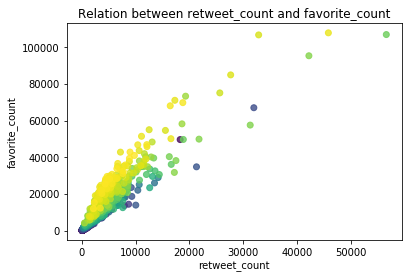

In [378]:
plt.scatter(x=Final_df.retweet_count ,y=Final_df.favorite_count, alpha=0.8,c=t,)
plt.title("Relation between retweet_count and favorite_count")
plt.xlabel("retweet_count")
plt.ylabel("favorite_count")
plt.show()

#### we can see that the that the relation is positive relation as one variable increases the other increases too.(Positive correlation )

In [379]:
Final_df_p1_p2=Final_df[Final_df['p1_conf'] > Final_df['p2_conf']]

In [380]:
Final_df_p2_p3=Final_df[Final_df['p2_conf'] > Final_df['p3_conf']]

In [381]:
Final_df_p1_p3=Final_df[Final_df['p1_conf'] > Final_df['p3_conf']]

In [382]:
Final_df_p1_p2.tweet_id.count()

1442

In [383]:
Final_df_p2_p3.tweet_id.count()

1442

In [384]:
Final_df_p1_p3.tweet_id.count()

1442

#### p1_confidence is always greater than p2_conf and p3_conf

In [385]:
Final_df['Counts'] = Final_df.groupby(['p1'])['p1'].transform('count')

In [386]:
Final_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp,rating_numerator,name,dog_stage,favorite_count,retweet_count,retweeted,Counts
0,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,2015-11-15 23:05:30,7,a,None,132,48,False,4
1,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,2015-11-15 23:21:54,9,a,None,128,47,False,16
2,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,2015-11-16 00:04:52,6,a,None,311,147,False,3
3,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,2015-11-16 00:30:50,10,a,None,136,60,False,10
4,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,2015-11-16 00:35:11,2,an,None,1253,879,False,1


In [387]:
Final_df_dog=Final_df[['p1','Counts']]

In [388]:
Final_df_dog = Final_df_dog.drop_duplicates(subset="p1")

In [389]:
Final_df_dog=Final_df_dog[Final_df_dog.Counts>20]

In [390]:
Final_df_dog[Final_df_dog.Counts>20]

,p1,Counts
5,chow,34
8,golden_retriever,95
18,Labrador_retriever,67
28,Chihuahua,61
30,Pembroke,68
31,toy_poodle,32
51,Pomeranian,28
57,malamute,23
85,French_bulldog,22
104,pug,42


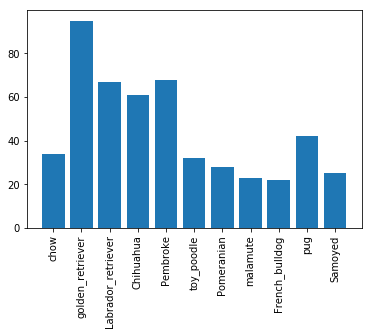

In [391]:
plt.bar(Final_df_dog.p1,Final_df_dog.Counts)
plt.xticks(rotation=90)
plt.show()

#### The highest count of a dog type was the golden retriever and the lowest is the french_bulldog

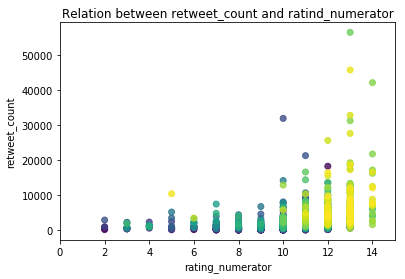

In [392]:
plt.scatter(y=Final_df.retweet_count ,x=Final_df.rating_numerator, alpha=0.8,c=t,)
plt.title("Relation between retweet_count and ratind_numerator")
plt.xlabel("rating_numerator")
plt.ylabel("retweet_count")
plt.xlim(0, 15)
plt.show()

#### As the rating_numerator increase the retweet_count reaches higher counts .  